In [1]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv(r'C:\Users\Hp\OneDrive - Shri Vile Parle Kelavani Mandal\Desktop\3rd Year\DAV\practice\data\winners_f1_1950_2025_v2.csv')
df.head()

,date,continent,grand_prix,circuit,winner_name,team,time,laps,year
0,1950-05-13,Europe,Great Britain,Silverstone Circuit,Nino Farina,Alfa Romeo,02:13:23,70.0,1950
1,1950-05-21,Europe,Monaco,Circuit de Monaco,Juan Manuel Fangio,Alfa Romeo,03:13:18,100.0,1950
2,1950-05-30,North America,United States,Indianapolis Motor Speedway,Johnnie Parsons,Kurtis Kraft Offenhauser,02:46:55,138.0,1950
3,1950-06-04,Europe,Switzerland,Circuit Bremgarten,Nino Farina,Alfa Romeo,02:02:53,42.0,1950
4,1950-06-18,Europe,Belgium,Circuit de Spa Francorchamps,Juan Manuel Fangio,Alfa Romeo,02:47:26,35.0,1950


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1142 entries, 0 to 1141
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1142 non-null   object 
 1   continent    1142 non-null   object 
 2   grand_prix   1142 non-null   object 
 3   circuit      1142 non-null   object 
 4   winner_name  1142 non-null   object 
 5   team         1142 non-null   object 
 6   time         1142 non-null   object 
 7   laps         1142 non-null   float64
 8   year         1142 non-null   int64  
dtypes: float64(1), int64(1), object(7)
memory usage: 80.4+ KB


In [4]:
df.isnull().sum()

date           0
continent      0
grand_prix     0
circuit        0
winner_name    0
team           0
time           0
laps           0
year           0
dtype: int64

In [5]:
df.dtypes

date            object
continent       object
grand_prix      object
circuit         object
winner_name     object
team            object
time            object
laps           float64
year             int64
dtype: object

In [6]:
df['date'] = pd.to_datetime(df['date'])

In [7]:
df.dtypes

date           datetime64[ns]
continent              object
grand_prix             object
circuit                object
winner_name            object
team                   object
time                   object
laps                  float64
year                    int64
dtype: object

In [8]:
df['time'] = pd.to_datetime(df['time'], format='%H:%M:%S', errors='coerce').dt.time

In [9]:
mean  = df.mean(numeric_only=True)
median =  df.median(numeric_only=True)
mode = df.mode(numeric_only=True).iloc[0]
std = df.std(numeric_only=True)

In [10]:
print("Mean: \n", mean)
print("\nMedian: \n", median)
print("\nMode: \n", mode)
print("\nStandard Deviation: \n", std)

Mean: 
 laps      64.617338
year    1992.999124
dtype: float64

Median: 
 laps      64.0
year    1995.0
dtype: float64

Mode: 
 laps      53.0
year    2024.0
Name: 0, dtype: float64

Standard Deviation: 
 laps    20.065139
year    20.850097
dtype: float64


# Visualizations

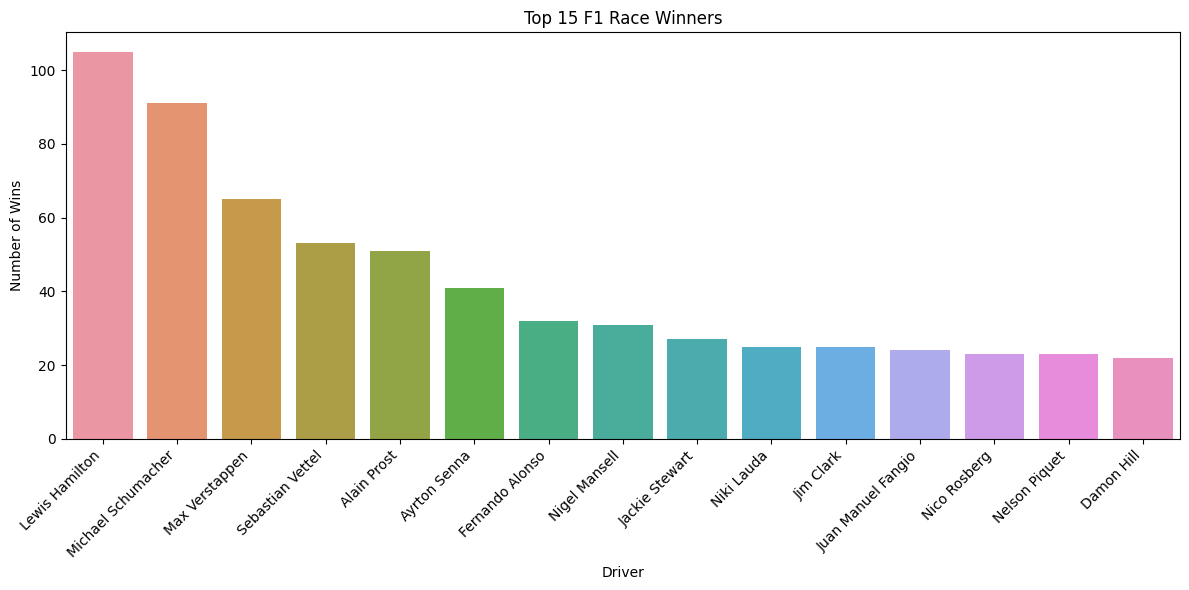

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Execute this cell if df is not loaded
if 'df' not in globals():
    df = pd.read_csv('winners_f1_1950_2025_v2.csv')
    df['date'] = pd.to_datetime(df['date'])
    df['time'] = pd.to_datetime(df['time'], format='%H:%M:%S', errors='coerce').dt.time

plt.figure(figsize=(12, 6))
winner_counts = df['winner_name'].value_counts().head(15)
sns.barplot(x=winner_counts.index, y=winner_counts.values)
plt.title('Top 15 F1 Race Winners')
plt.xlabel('Driver')
plt.ylabel('Number of Wins')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

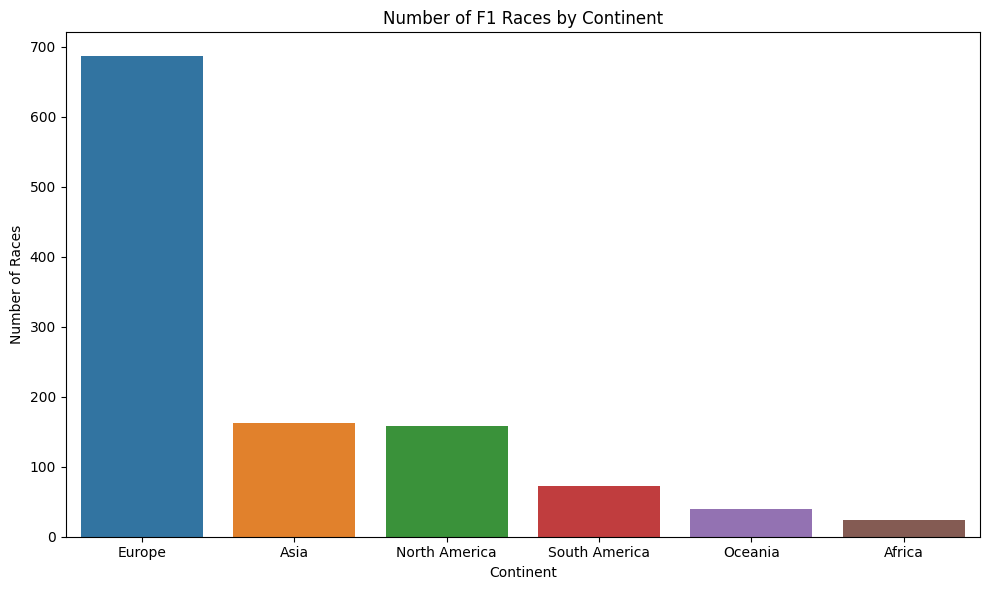

In [12]:
plt.figure(figsize=(10, 6))
continent_counts = df['continent'].value_counts()
sns.barplot(x=continent_counts.index, y=continent_counts.values)
plt.title('Number of F1 Races by Continent')
plt.xlabel('Continent')
plt.ylabel('Number of Races')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

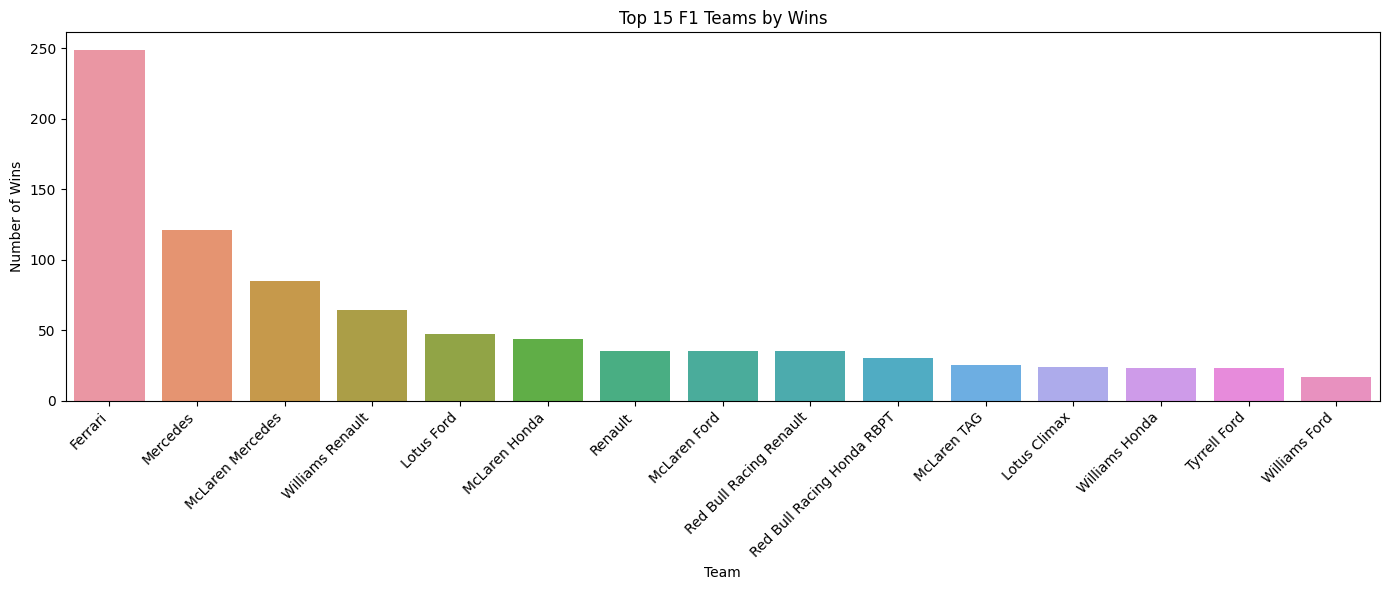

In [13]:
plt.figure(figsize=(14, 6))
team_counts = df['team'].value_counts().head(15)
sns.barplot(x=team_counts.index, y=team_counts.values)
plt.title('Top 15 F1 Teams by Wins')
plt.xlabel('Team')
plt.ylabel('Number of Wins')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

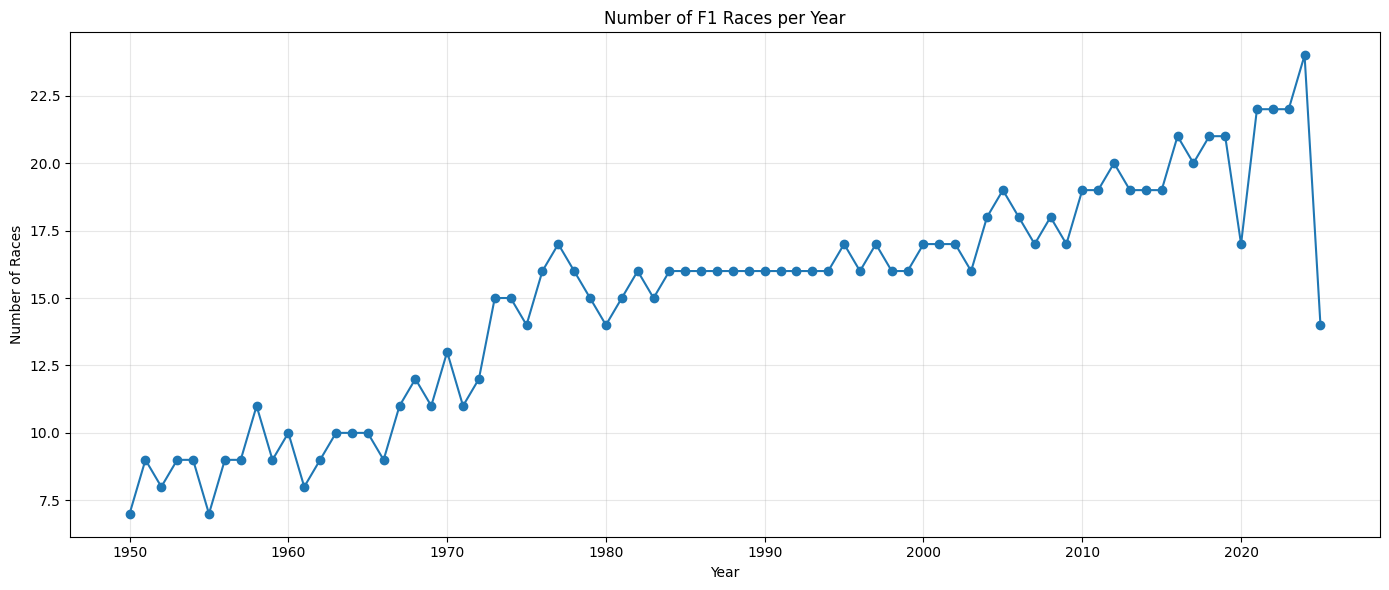

In [14]:
plt.figure(figsize=(14, 6))
yearly_races = df.groupby('year').size()
plt.plot(yearly_races.index, yearly_races.values, marker='o')
plt.title('Number of F1 Races per Year')
plt.xlabel('Year')
plt.ylabel('Number of Races')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

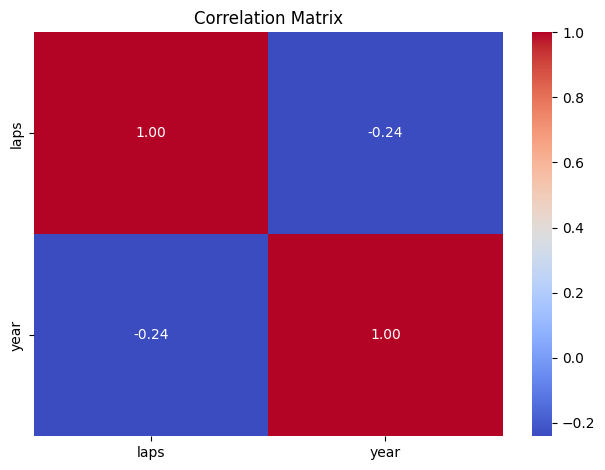

In [15]:
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

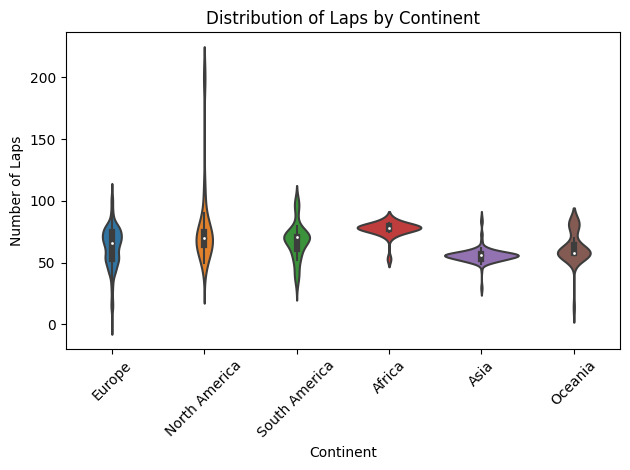

In [16]:
sns.violinplot(x='continent', y='laps', data=df)
plt.title('Distribution of Laps by Continent')
plt.xlabel('Continent')
plt.xticks(rotation=45)
plt.ylabel('Number of Laps')
plt.tight_layout()
plt.show()

# Label Encoder

In [17]:
le = LabelEncoder()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
categorical_cols.remove('time')

for col in categorical_cols:
    df[col + '_encoded'] = le.fit_transform(df[col])

df.head()

,date,continent,grand_prix,circuit,winner_name,team,time,laps,year,continent_encoded,grand_prix_encoded,circuit_encoded,winner_name_encoded,team_encoded
0,1950-05-13,Europe,Great Britain,Silverstone Circuit,Nino Farina,Alfa Romeo,02:13:23,70.0,1950,2,11,69,83,0
1,1950-05-21,Europe,Monaco,Circuit de Monaco,Juan Manuel Fangio,Alfa Romeo,03:13:18,100.0,1950,2,18,29,60,0
2,1950-05-30,North America,United States,Indianapolis Motor Speedway,Johnnie Parsons,Kurtis Kraft Offenhauser,02:46:55,138.0,1950,3,35,45,53,22
3,1950-06-04,Europe,Switzerland,Circuit Bremgarten,Nino Farina,Alfa Romeo,02:02:53,42.0,1950,2,33,21,83,0
4,1950-06-18,Europe,Belgium,Circuit de Spa Francorchamps,Juan Manuel Fangio,Alfa Romeo,02:47:26,35.0,1950,2,5,33,60,0


# One-Hot Encoder

In [18]:
ohe = OneHotEncoder(sparse_output=False)
categorical_cols_selected = ['continent', 'grand_prix', 'team']
ohe_array = ohe.fit_transform(df[categorical_cols_selected])
ohe_feature_names = ohe.get_feature_names_out(categorical_cols_selected)
ohe_df = pd.DataFrame(ohe_array, columns=ohe_feature_names, index=df.index)
df_with_ohe = pd.concat([df, ohe_df], axis=1)
df_with_ohe.head()

,date,continent,grand_prix,circuit,winner_name,team,time,laps,year,continent_encoded,...,team_Shadow Ford,team_Stewart Ford,team_Tyrrell Ford,team_Vanwall,team_Watson Offenhauser,team_Williams BMW,team_Williams Ford,team_Williams Honda,team_Williams Renault,team_Wolf Ford
0,1950-05-13,Europe,Great Britain,Silverstone Circuit,Nino Farina,Alfa Romeo,02:13:23,70.0,1950,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1950-05-21,Europe,Monaco,Circuit de Monaco,Juan Manuel Fangio,Alfa Romeo,03:13:18,100.0,1950,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1950-05-30,North America,United States,Indianapolis Motor Speedway,Johnnie Parsons,Kurtis Kraft Offenhauser,02:46:55,138.0,1950,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1950-06-04,Europe,Switzerland,Circuit Bremgarten,Nino Farina,Alfa Romeo,02:02:53,42.0,1950,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1950-06-18,Europe,Belgium,Circuit de Spa Francorchamps,Juan Manuel Fangio,Alfa Romeo,02:47:26,35.0,1950,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
df_with_ohe.shape

(1142, 121)

# Aggregate functions

In [20]:
df.describe()

,date,laps,year,continent_encoded,grand_prix_encoded,circuit_encoded,winner_name_encoded,team_encoded
count,1142,1142.000000,1142.000000,1142.000000,1142.000000,1142.000000,1142.000000,1142.000000
mean,1993-07-10 21:34:59.474605952,64.617338,1992.999124,2.211033,15.027145,36.570928,56.191769,34.033275
min,1950-05-13 00:00:00,1.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1977-03-12 06:00:00,54.000000,1977.000000,2.000000,7.000000,17.000000,27.000000,17.000000
50%,1995-05-21 00:00:00,64.000000,1995.000000,2.000000,12.000000,33.000000,66.000000,37.000000
75%,2011-10-05 12:00:00,72.000000,2011.000000,2.000000,21.000000,56.750000,77.000000,47.000000
max,2025-08-03 00:00:00,200.000000,2025.000000,5.000000,35.000000,76.000000,114.000000,64.000000
std,NaN,20.065139,20.850097,1.012689,9.833948,21.736244,32.325213,16.836241


In [21]:
stats = df[['laps', 'year']].agg(['mean', 'median', 'std', 'min', 'max'])
mode_values = df[['winner_name','grand_prix','circuit', 'continent']].mode().iloc[0]

mode_df = pd.DataFrame({'laps': [mode_values['winner_name']], 'year': [mode_values['grand_prix']]}, index=['mode'])

results = pd.concat([stats, mode_df])
results = results.transpose().reset_index()
results.rename(columns={'index': 'Statistic'}, inplace=True)
results

,Statistic,mean,median,std,min,max,mode
0,laps,64.617338,64.0,20.065139,1.0,200.0,Lewis Hamilton
1,year,1992.999124,1995.0,20.850097,1950.0,2025.0,Italy
